In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#questions about importing from sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [3]:
df = pd.read_excel('census data.xlsx')


In [4]:
df["income"] = df["income"].map(lambda x: 1 if (x == ">50K") else 0)

In [5]:
X = df[[col for col in df.columns if col != 'income']]
y = df["income"]

In [6]:
X = pd.get_dummies(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [8]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)

In [8]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8393899068481933
0.6717484516436398
0.6157205240174672
0.6425153793574846


<AxesSubplot:>

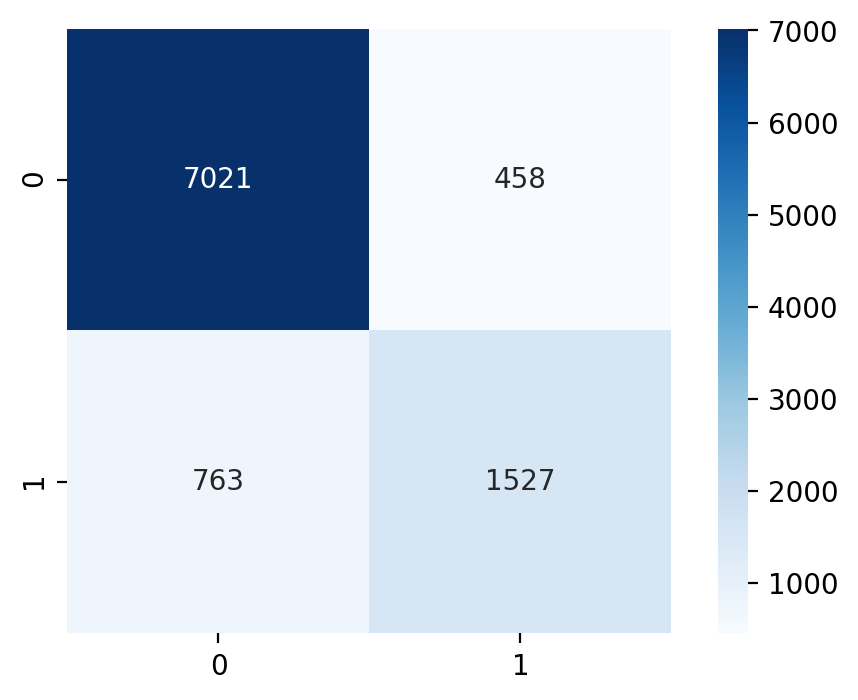

In [9]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [10]:
acc = []
recall = []
precision = []
f1 = []
n = 1

while n < 25:
    bc_model = xgb.XGBClassifier(max_depth =n)
    bc_model.fit(X_train, y_train)
    result = bc_model.predict(X_test)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


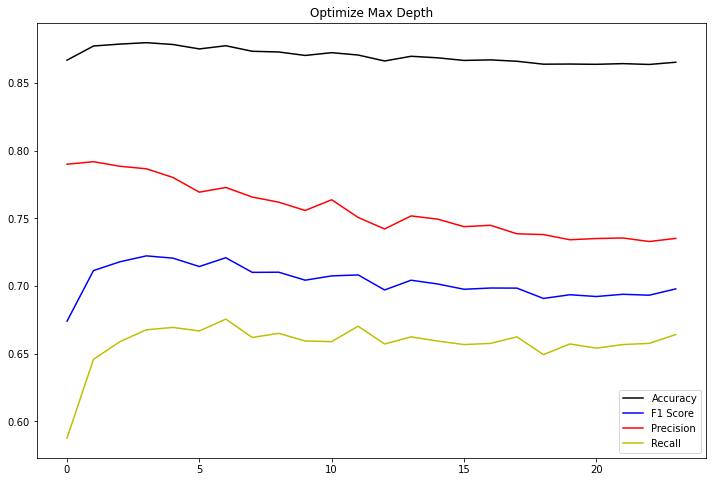

In [11]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Max Depth")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [13]:
acc = []
recall = []
precision = []
f1 = []
n = 1

while n < 25:
    bc_model = xgb.XGBClassifier(scale_pos_weight =n)
    bc_model.fit(X_train, y_train)
    result = bc_model.predict(X_test)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


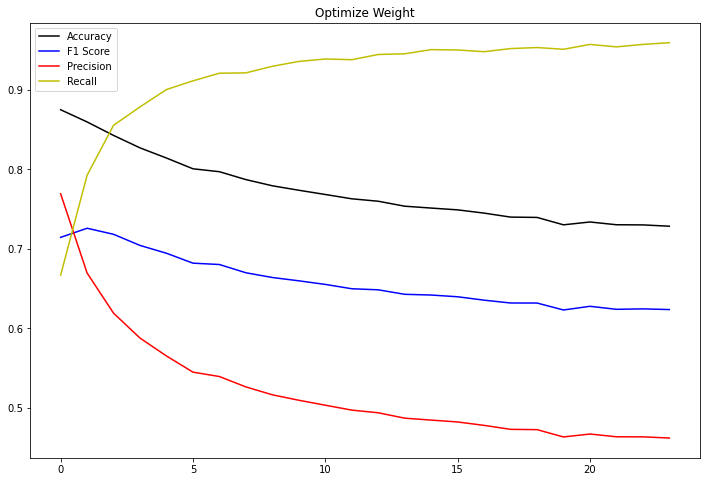

In [15]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Weight")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [18]:
acc_2 = []
recall_2 = []
precision_2= []
f1_2 = []
n = 1

while n < 20:
    bc_model = xgb.XGBClassifier(gamma =n)
    bc_model.fit(X_train, y_train)
    result = bc_model.predict(X_test)
    acc_2.append(accuracy_score(y_test,result))
    precision_2.append(precision_score(y_test,result))
    recall_2.append(recall_score(y_test,result))
    f1_2.append(f1_score(y_test,result))
    print(n)
    n = n + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


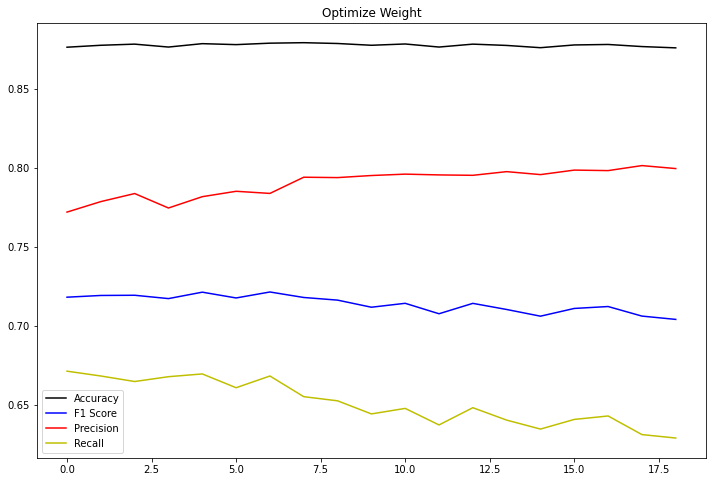

In [19]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc_2, color = 'black', label = 'Accuracy')
ax.plot(f1_2[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision_2[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall_2[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Weight")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [20]:
acc_3 = []
recall_3 = []
precision_3= []
f1_3 = []
n = 1

while n < 20:
    bc_model = xgb.XGBClassifier(min_child_weight =n)
    bc_model.fit(X_train, y_train)
    result = bc_model.predict(X_test)
    acc_3.append(accuracy_score(y_test,result))
    precision_3.append(precision_score(y_test,result))
    recall_3.append(recall_score(y_test,result))
    f1_3.append(f1_score(y_test,result))
    print(n)
    n = n + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


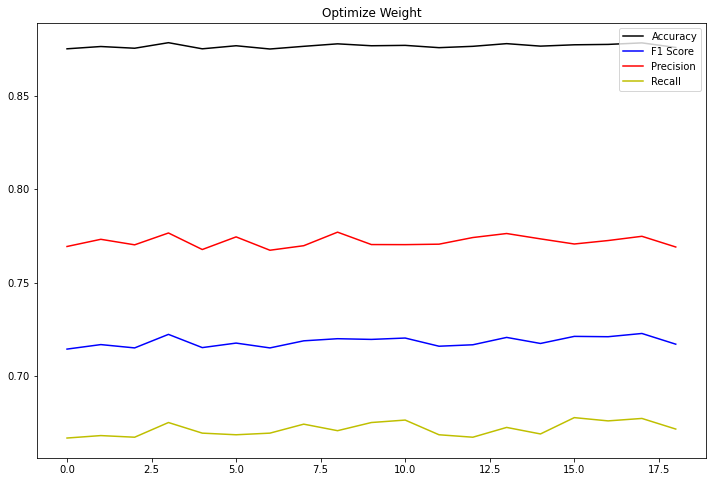

In [21]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc_3, color = 'black', label = 'Accuracy')
ax.plot(f1_3[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision_3[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall_3[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Weight")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [22]:
acc_4 = []
recall_4 = []
precision_4= []
f1_4 = []
n = 100

while n < 2000:
    bc_model = xgb.XGBClassifier(n_estimators =n)
    bc_model.fit(X_train, y_train)
    result = bc_model.predict(X_test)
    acc_4.append(accuracy_score(y_test,result))
    precision_4.append(precision_score(y_test,result))
    recall_4.append(recall_score(y_test,result))
    f1_4.append(f1_score(y_test,result))
    print(n)
    n = n + 100

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


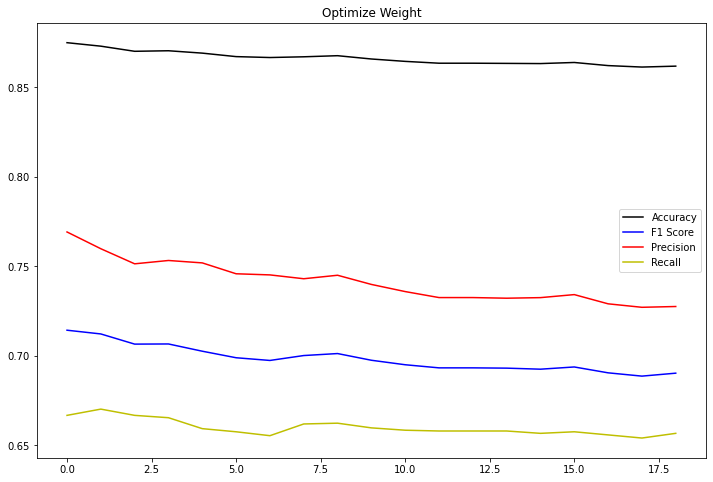

In [23]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc_4, color = 'black', label = 'Accuracy')
ax.plot(f1_4[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision_4[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall_4[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Weight")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [24]:
acc_5 = []
recall_5 = []
precision_5 = []
f1_5 = []
n = .1

while n < 1:
    bc_model = xgb.XGBClassifier(learning_rate =n)
    bc_model.fit(X_train, y_train)
    result = bc_model.predict(X_test)
    acc_5.append(accuracy_score(y_test,result))
    precision_5.append(precision_score(y_test,result))
    recall_5.append(recall_score(y_test,result))
    f1_5.append(f1_score(y_test,result))
    print(n)
    n = n + .1

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


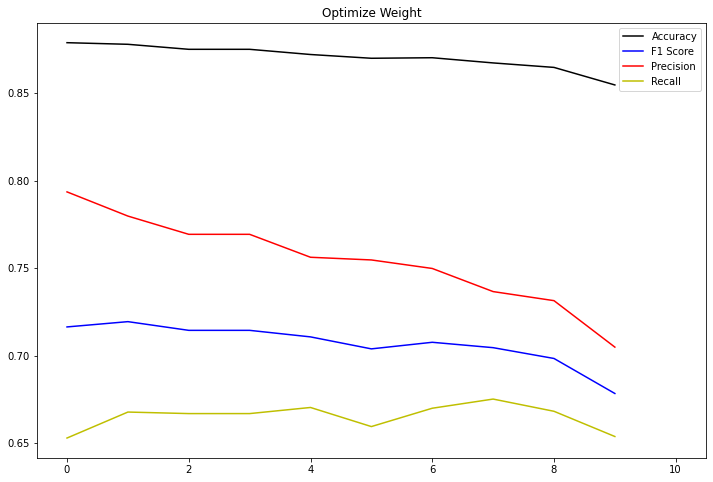

In [25]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc_5, color = 'black', label = 'Accuracy')
ax.plot(f1_5[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision_5[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall_5[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Weight")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [31]:
acc_6 = []
recall_6 = []
precision_6 = []
f1_6 = []
n = .1

while n < 1:
    bc_model = xgb.XGBClassifier(subsample =n)
    bc_model.fit(X_train, y_train)
    result = bc_model.predict(X_test)
    acc_6.append(accuracy_score(y_test,result))
    precision_6.append(precision_score(y_test,result))
    recall_6.append(recall_score(y_test,result))
    f1_6.append(f1_score(y_test,result))
    print(n)
    n = n + .1

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


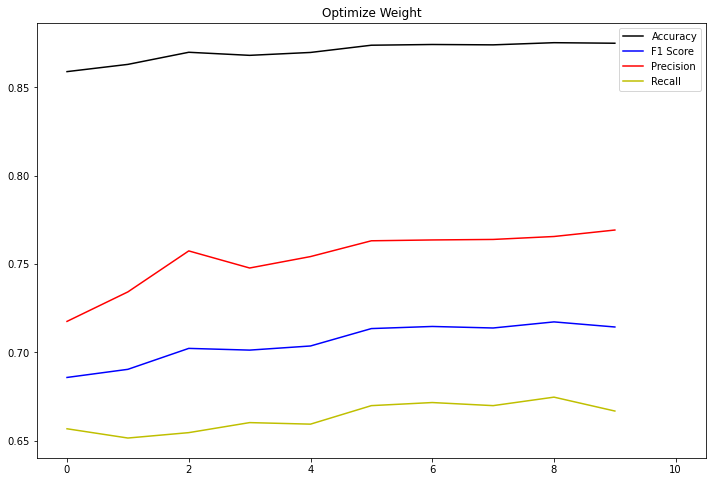

In [29]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc_6, color = 'black', label = 'Accuracy')
ax.plot(f1_6[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision_6[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall_6[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Weight")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [33]:
params = {
    'learning_rate': [.1,.2,.3,.4,.5,.6,.7,.8,.9],
    'n_estimators': range(100,1000,100),
    'min_child_weight': range(1,20,1),
    'gamma': range (1,20,1),
    'subsample': [.1,.2,.3,.4,.5,.6,.7,.8,.9],
    'max_depth': range(1,25,1),
    'scale_pos_weight': range(1,6,1)
}

In [35]:
X_trainval2, X_test2, y_trainval2, y_test2 = train_test_split(X, y, test_size=0.15, random_state=33, stratify=y)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_trainval2, y_trainval2, test_size=0.15, random_state=33, stratify=y_trainval2)

In [39]:
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import RandomizedSearchCV

In [37]:
## Took some of this code from Lew's office hour
split_index = [-1 if x in X_train2.index else 0 for x in X_trainval2.index]
pds = PredefinedSplit(test_fold = split_index)


In [77]:
xgb_tune = xgb.XGBClassifier()
xgb_grid = RandomizedSearchCV(
    estimator = xgb_tune,
    param_distributions = params,
    cv=pds,
    scoring='f1',
    n_iter=25
)
xgb_grid.fit(X_trainval2, y_trainval2)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                  

In [78]:
result = xgb_grid.predict(X_test2)

In [79]:
print(accuracy_score(y_test2,result))
print(precision_score(y_test2,result))
print(recall_score(y_test2,result))
print(f1_score(y_test2,result))

0.856421454892862
0.6734289955467591
0.7763833428408443
0.7212506624271331


<AxesSubplot:>

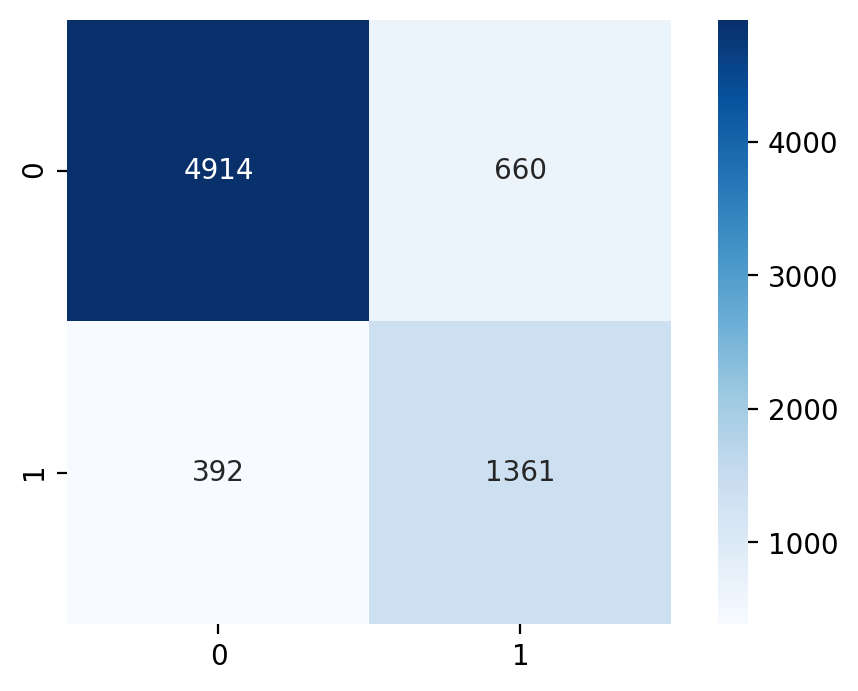

In [80]:
tc = confusion_matrix(y_test2,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [45]:
params2 = {
    'learning_rate': [.1,.2,.3,.4,.5,.6,.7,.8,.9],
    'n_estimators': range(100,1000,100),
    'min_child_weight': range(1,20,1),
    'gamma': range (1,20,1),
    'subsample': [.1,.2,.3,.4,.5,.6,.7,.8,.9],
    'max_depth': range(1,25,1)
}

In [81]:
xgb_tune2 = xgb.XGBClassifier()
xgb_grid2 = RandomizedSearchCV(
    estimator = xgb_tune,
    param_distributions = params2,
    cv=pds,
    scoring=['accuracy','f1'],
    n_iter=25
)
xgb_grid2.fit(X_trainval2, y_trainval2)

ValueError: For multi-metric scoring, the parameter refit must be set to a scorer key or a callable to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.

In [48]:
result = xgb_grid2.predict(X_test2)

In [49]:
print(accuracy_score(y_test2,result))
print(precision_score(y_test2,result))
print(recall_score(y_test2,result))
print(f1_score(y_test2,result))

0.8693871980346664
0.7733516483516484
0.6423274386765545
0.701776254284824


<AxesSubplot:>

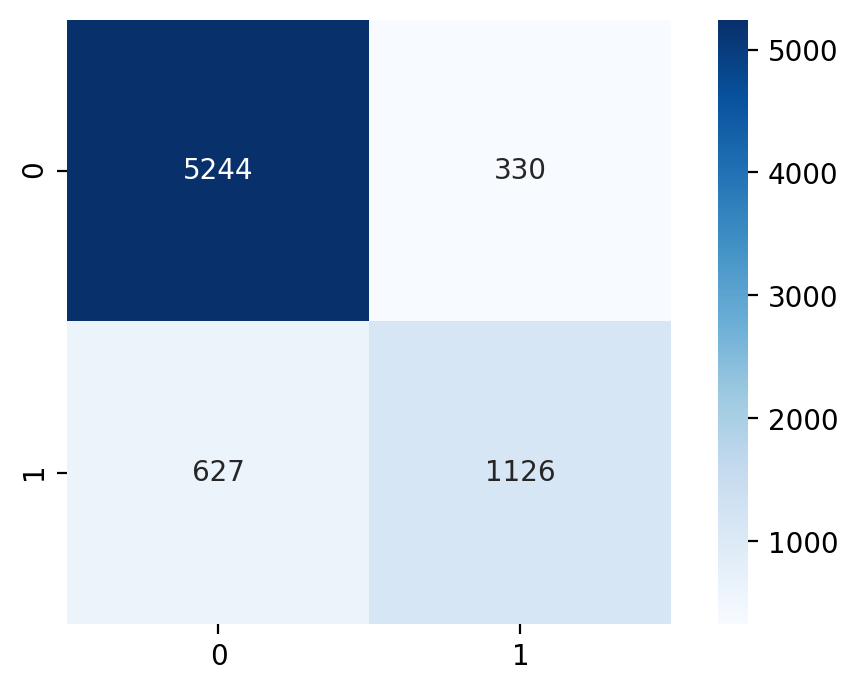

In [50]:
tc = confusion_matrix(y_test2,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [53]:
print(bc_model.feature_importances_)

[0.01017354 0.00386708 0.04900657 0.04545308 0.02242717 0.0086598
 0.00151367 0.01499667 0.00817679 0.         0.00465343 0.00579803
 0.00888505 0.00518659 0.00187167 0.00642748 0.00393931 0.00073702
 0.00235241 0.00476211 0.00281674 0.         0.00444106 0.00387904
 0.00364806 0.         0.00259322 0.00415338 0.         0.00572554
 0.00265667 0.00425815 0.00638666 0.40161467 0.00338515 0.00498115
 0.00085954 0.00369397 0.00943874 0.0063017  0.         0.00333048
 0.019118   0.019776   0.01336868 0.00853774 0.03132056 0.00222716
 0.01440465 0.00935679 0.00655101 0.01107786 0.00458428 0.00362018
 0.00666261 0.00890004 0.02612279 0.00193839 0.00888998 0.00396001
 0.0043928  0.00605301 0.00255112 0.0049453  0.00719677 0.
 0.00330583 0.0021754  0.00540522 0.00410721 0.00376516 0.00289874
 0.0026294  0.00066169 0.00089398 0.0032961  0.00276943 0.00288295
 0.00249703 0.         0.         0.         0.         0.
 0.         0.00312456 0.         0.00146607 0.00309318 0.00279732
 0.00432394 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

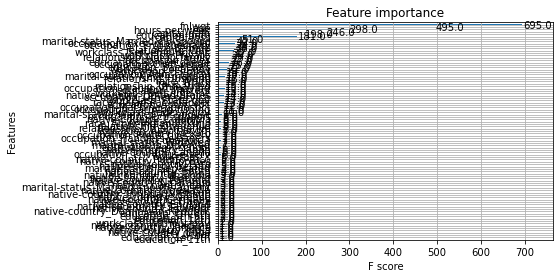

In [57]:
from xgboost import plot_importance
plot_importance(bc_model)

In [58]:
print(acc)
print(precision)
print(recall)
print(f1)

[0.8750127955778483, 0.8596581021598936, 0.8426655747773569, 0.8270037874910431, 0.8142082096427474, 0.8006960794349472, 0.7970109530146381, 0.7870815846043607, 0.779301873272597, 0.7736718190193469, 0.7683488586344559, 0.7629235336267786, 0.7598525949431877, 0.7536083529532194, 0.751253966629133, 0.7490019449278329, 0.7449073600163784, 0.7398914934998464, 0.739482035008701, 0.7301668543351417, 0.7337496161326645, 0.7302692189579282, 0.7300644897123554, 0.7284266557477735]
[0.7692695214105794, 0.6694946514201402, 0.6189573459715639, 0.5876168224299065, 0.5650863250205536, 0.5447663795353693, 0.539248274098696, 0.5261845386533666, 0.5162463627546072, 0.5093891133824578, 0.5031593728059911, 0.4969921332716335, 0.4936102236421725, 0.4868450640881493, 0.48442367601246106, 0.4820558263181214, 0.4777728873239437, 0.4727824766861852, 0.4724085695736853, 0.46320714589536366, 0.4668796592119276, 0.4634146341463415, 0.4633269921792433, 0.46184570107210426]
[0.6668122270742358, 0.7925764192139738

In [59]:
print(acc_2)
print(precision_2)
print(recall_2)
print(f1_2)

[0.8764459002968574, 0.8776742757702938, 0.8783908281297983, 0.8765482649196438, 0.8786979219981574, 0.8780837342614393, 0.8790050158665166, 0.8793121097348756, 0.8788002866209438, 0.8776742757702938, 0.8784931927525848, 0.8765482649196438, 0.8783908281297983, 0.8775719111475074, 0.8761388064284983, 0.8778790050158665, 0.8781860988842256, 0.8768553587880029, 0.8760364418057119]
[0.7719738824711201, 0.7786259541984732, 0.7837281153450052, 0.7745694022289767, 0.7817440081591025, 0.785158277114686, 0.7838114754098361, 0.7940709370037057, 0.793836344314559, 0.7951482479784366, 0.7960279119699409, 0.7955288985823337, 0.7952840300107181, 0.7976060935799782, 0.7957283680175247, 0.7985846488840501, 0.7982646420824295, 0.8014420410427066, 0.7995558023320377]
[0.6711790393013101, 0.6681222707423581, 0.6646288209606986, 0.6676855895196506, 0.6694323144104803, 0.6606986899563319, 0.6681222707423581, 0.6550218340611353, 0.6524017467248908, 0.6441048034934498, 0.6475982532751092, 0.637117903930131, 

In [60]:
print(acc_3)
print(precision_3)
print(recall_3)
print(f1_3)

[0.8750127955778483, 0.8762411710512846, 0.8753198894462074, 0.878288463507012, 0.8750127955778483, 0.8766506295424301, 0.8749104309550619, 0.8763435356740711, 0.8776742757702938, 0.8766506295424301, 0.8768553587880029, 0.8756269833145665, 0.8763435356740711, 0.8777766403930801, 0.8764459002968574, 0.877162452656362, 0.8773671819019347, 0.8781860988842256, 0.8757293479373528]
[0.7692695214105794, 0.7731177362304194, 0.7701612903225806, 0.7764942240080361, 0.7676514772158237, 0.7744056651492159, 0.7672672672672672, 0.769690927218345, 0.7769347496206374, 0.7703039362232187, 0.7702635504724018, 0.770508303975843, 0.7740628166160081, 0.7762096774193549, 0.773346794548208, 0.7706057596822244, 0.7724550898203593, 0.7747252747252747, 0.769]
[0.6668122270742358, 0.6681222707423581, 0.6672489082969433, 0.6751091703056769, 0.6694323144104803, 0.6685589519650655, 0.6694323144104803, 0.674235807860262, 0.6707423580786026, 0.6751091703056769, 0.6764192139737991, 0.6685589519650655, 0.66724890829694

In [61]:
print(acc_4)
print(precision_4)
print(recall_4)
print(f1_4)

[0.8750127955778483, 0.8730678677449074, 0.8702016583068891, 0.8705087521752483, 0.8691780120790255, 0.8672330842460846, 0.8667212611321528, 0.8671307196232982, 0.8677449073600164, 0.8659023441498618, 0.8645716040536391, 0.8635479578257754, 0.8635479578257754, 0.8634455932029891, 0.8633432285802027, 0.8639574163169209, 0.8622172177295526, 0.8613983007472618, 0.8619101238611936]
[0.7692695214105794, 0.7599009900990099, 0.7514763779527559, 0.7533366287691547, 0.75199203187251, 0.7459138187221397, 0.7452830188679245, 0.7431372549019608, 0.7450884086444007, 0.7399608227228207, 0.7359687652513421, 0.732620320855615, 0.732620320855615, 0.7322643343051506, 0.7325864588407209, 0.7342759629449049, 0.7291262135922331, 0.7271844660194174, 0.7276245766811804]
[0.6668122270742358, 0.6703056768558951, 0.6668122270742358, 0.6655021834061136, 0.6593886462882096, 0.6576419213973799, 0.6554585152838428, 0.6620087336244541, 0.6624454148471616, 0.659825327510917, 0.6585152838427948, 0.6580786026200873, 0.

In [62]:
print(acc_4)
print(precision_4)
print(recall_4)
print(f1_4)

[0.8750127955778483, 0.8730678677449074, 0.8702016583068891, 0.8705087521752483, 0.8691780120790255, 0.8672330842460846, 0.8667212611321528, 0.8671307196232982, 0.8677449073600164, 0.8659023441498618, 0.8645716040536391, 0.8635479578257754, 0.8635479578257754, 0.8634455932029891, 0.8633432285802027, 0.8639574163169209, 0.8622172177295526, 0.8613983007472618, 0.8619101238611936]
[0.7692695214105794, 0.7599009900990099, 0.7514763779527559, 0.7533366287691547, 0.75199203187251, 0.7459138187221397, 0.7452830188679245, 0.7431372549019608, 0.7450884086444007, 0.7399608227228207, 0.7359687652513421, 0.732620320855615, 0.732620320855615, 0.7322643343051506, 0.7325864588407209, 0.7342759629449049, 0.7291262135922331, 0.7271844660194174, 0.7276245766811804]
[0.6668122270742358, 0.6703056768558951, 0.6668122270742358, 0.6655021834061136, 0.6593886462882096, 0.6576419213973799, 0.6554585152838428, 0.6620087336244541, 0.6624454148471616, 0.659825327510917, 0.6585152838427948, 0.6580786026200873, 0.

In [63]:
print(acc_5)
print(precision_5)
print(recall_5)
print(f1_5)

[0.8788002866209438, 0.8778790050158665, 0.8750127955778483, 0.8750127955778483, 0.8720442215170437, 0.8698945644385301, 0.8702016583068891, 0.8672330842460846, 0.8646739686764254, 0.8546422356433616]
[0.7935244161358811, 0.7797042325344212, 0.7692695214105794, 0.7692695214105794, 0.7561576354679803, 0.7546226886556722, 0.7497556207233627, 0.7365412101000477, 0.731357552581262, 0.7048022598870056]
[0.6528384279475983, 0.6676855895196506, 0.6668122270742358, 0.6668122270742358, 0.6703056768558951, 0.6593886462882096, 0.6698689956331878, 0.6751091703056769, 0.6681222707423581, 0.6537117903930131]
[0.716339242932439, 0.7193601505528112, 0.7143859649122807, 0.7143859649122807, 0.710648148148148, 0.7037986483337216, 0.7075645756457565, 0.7044884939621782, 0.6983112733911456, 0.6782963298595377]


In [64]:
print(acc_6)
print(precision_6)
print(recall_6)
print(f1_6)

[0.858941549800389, 0.8630361347118436, 0.8698945644385301, 0.8681543658511618, 0.8697921998157436, 0.8738867847271983, 0.8742962432183438, 0.874091513972771, 0.8753198894462074, 0.8750127955778483]
[0.7175572519083969, 0.734251968503937, 0.7574532592218292, 0.7477744807121661, 0.7542457542457542, 0.7631840796019901, 0.7636544190665343, 0.7639442231075697, 0.765609514370664, 0.7692695214105794]
[0.6567685589519651, 0.651528384279476, 0.654585152838428, 0.6602620087336245, 0.6593886462882096, 0.6698689956331878, 0.6716157205240174, 0.6698689956331878, 0.6746724890829694, 0.6668122270742358]
[0.6858185134518924, 0.6904211013419713, 0.7022721948934176, 0.7012987012987013, 0.7036346691519105, 0.7134883720930234, 0.7146840148698885, 0.7138203815728247, 0.7172701949860725, 0.7143859649122807]


In [ ]:
learning_rate = .2
min_child_weight = 4
or min_child_weight = 18
gamma = 7
scale_pos_weight = 1
scale_pos_weight = 2

In [73]:
bc_model = xgb.XGBClassifier(learning_rate = .2,gamma = 7)
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)


In [74]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8784931927525848
0.7879895561357703
0.6589519650655021
0.7177170035671819


<AxesSubplot:>

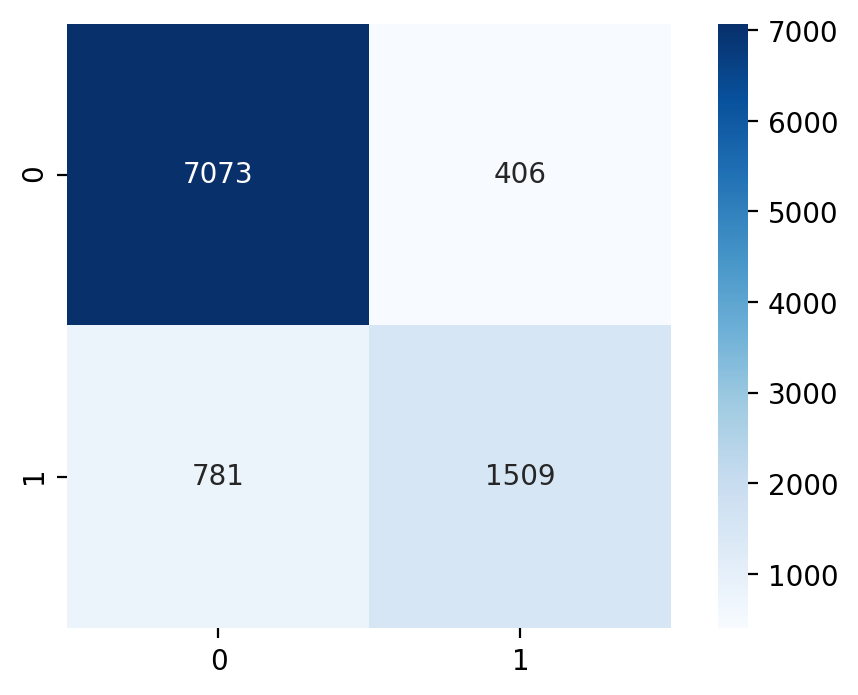

In [76]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")